In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.CIFAR10(root='../Data', train=True, download=True, transform=transform)

Files already downloaded and verified


In [4]:
test_data = datasets.CIFAR10(root='../Data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [5]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [8]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [9]:
for images, labels in train_loader:
    break

In [10]:
images.shape

torch.Size([32, 3, 32, 32])

In [11]:
labels

tensor([9, 5, 2, 3, 0, 5, 9, 5, 1, 6, 6, 2, 5, 7, 4, 8, 7, 0, 4, 4, 9, 5, 2, 9,
        6, 1, 6, 2, 9, 9, 5, 6])

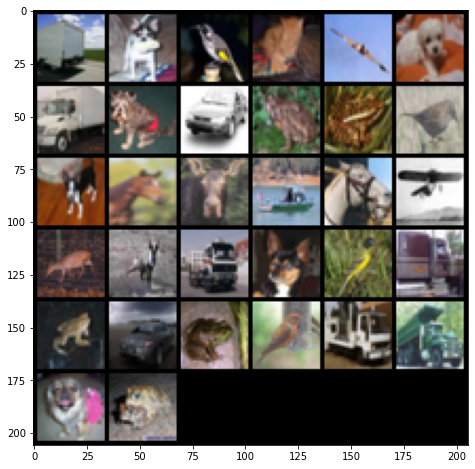

In [12]:
im = make_grid(images, nrow=6)
plt.figure(figsize=(28,8))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [40]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5,1) # 3 RBG channels
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(6*6*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [41]:
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [42]:
for param in model.parameters():
    print(param.numel())

450
6
864
16
69120
120
10080
84
840
10


In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [44]:
import time

start_time = time.time()


#variables (trackers)
EPOCHS = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#for loop for training

for epoch in range(EPOCHS):
    trn_corr = 0
    tst_corr = 0
    
    for batch, (X_train, y_train) in enumerate(train_loader):
        batch+=1

        y_pred = model(X_train) #no need to flatten those images
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_correct = (predicted == y_train).sum()
        trn_corr += batch_correct
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        if batch%600 == 0:
            print(f"Epoch: {epoch} Batch: {batch} Loss: {loss.item()}")
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    #test
    with torch.no_grad():
        for batch, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted==y_test).sum()
            
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f"Training took: {total/60}mins")

Epoch: 0 Batch: 600 Loss: 1.4635462760925293
Epoch: 0 Batch: 1200 Loss: 1.3489145040512085
Epoch: 1 Batch: 600 Loss: 1.4111078977584839
Epoch: 1 Batch: 1200 Loss: 1.0696475505828857
Epoch: 2 Batch: 600 Loss: 1.3547557592391968
Epoch: 2 Batch: 1200 Loss: 1.4363205432891846
Epoch: 3 Batch: 600 Loss: 1.157636284828186
Epoch: 3 Batch: 1200 Loss: 1.2060439586639404
Epoch: 4 Batch: 600 Loss: 1.525087833404541
Epoch: 4 Batch: 1200 Loss: 0.8812351822853088
Epoch: 5 Batch: 600 Loss: 1.1186275482177734
Epoch: 5 Batch: 1200 Loss: 1.2190371751785278
Epoch: 6 Batch: 600 Loss: 1.342793583869934
Epoch: 6 Batch: 1200 Loss: 0.8553839325904846
Epoch: 7 Batch: 600 Loss: 1.0889464616775513
Epoch: 7 Batch: 1200 Loss: 1.0842183828353882
Epoch: 8 Batch: 600 Loss: 0.9815805554389954
Epoch: 8 Batch: 1200 Loss: 0.7955254912376404
Epoch: 9 Batch: 600 Loss: 0.7790733575820923
Epoch: 9 Batch: 1200 Loss: 1.2107412815093994
Training took: 1.6356910904248556mins


In [45]:
torch.save(model.state_dict(), 'myCIRARmodel.pt')

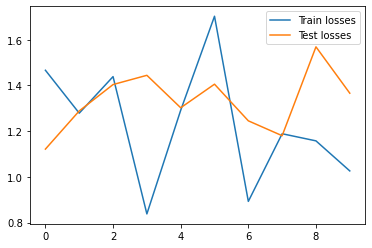

In [46]:
plt.plot(train_losses, label="Train losses")
plt.plot(test_losses, label="Test losses")
plt.legend()

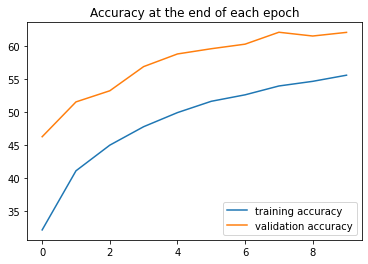

In [47]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [51]:
num_c = test_correct[-1].item()
print(num_c*100 / 10000)

62.01


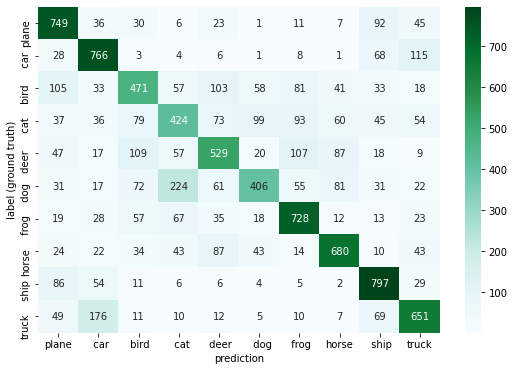

In [54]:
# Create a loader for the entire the test set
import seaborn as sn  # for heatmaps

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();